<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Rubén Hernández Guevara | Andrés Hernández Jiménez.

**Fecha:** 09 de Marzo del 2021.

**Expediente** : 717710 | 717895.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Rub27182n/Proyecto-SPF.git
    
**Repositorio de Pruebas:** https://github.com/Rub27182n/Tests_Proyecto-SPF.git

# Proyecto TEMA-2

# <font color='midnightblue'> 1. Análisis y Simulación de Videos de Youtube

> En este proyecto, examinaremos a detalle y simularemos las variables más escenciales de un video de YouTube: Likes, Dislikes, Comments y Views para obtener los estadísticos más probables de un hipotético video.

# <font color='midnightblue'> 2 . Objetivos

> ###  <font color='midnightblue'> Generales
>> Consideramos como objetivo principal, el generar modelos/funciónes que permita simular satisfactoriamente los principales y característicos estadísticos de los videos de YouTube México; utilizando los máximos recursos  posibles aprendidos hasta el tema dos de la materia.
    
> ###  <font color='midnightblue'> Específicos
>> - Obtener la Función de Distribución de Probabilidad de cada estadístico.
>> - Simular cantidad de Likes, Dislikes, Comments y Views.
>> - Aplicar satisfactoriamente los temas vistos en clase.
>> - Encontrar propiedades estadísticas lo más parecidas posibles a los datos reales

# <font color='midnightblue'> 3.  Definición del Problema
    
> En este proyecto queremos plantear la idea de una compañía que opera con Data Science,  y que a través de una base de datos de videos de YouTube, le es posible obtener distribuciones de probabilidad y simular casos específicos de hipotéticos videos, a los cuales se pretende estimar su recibimiento (número de vistas, likes, dislikes y comentarios) en la plataforma. 
    
> Todos los datos que se utilizarán son datos reales de videos que han estado en la sección "Tendencias" en Youtube México. Con los 4 estadísticos previamente mencionados, se podrá obtener la información necesaria para evaluar las diferentes categorías de videos y su recibimiento en la plataforma a través de simulación Monte Carlo. Estos parámetros serán los nodos para trabajar específicamente y a través de estos se generarán datos que nos permiten cumplir con el objetivo central, examinar a detalle y simular las variables escenciales de un video de YouTube. 

In [ ]:
from IPython import display 
display.Image("./diagrama.png")

# <font color='midnightblue'> 4. Nodos/Variables a Simular

> Los nodos/variables que elegimos son:
> - Número de Vistas
> - Cantidad de Likes
> - Cantidad de Dislikes
> - Número de Comentarios

> Estos nodos fueron elegidos porque generamos la hipótesis de que intrínsecamente están correlacioandos y además se pueden simular ante el supuesto de un video ingresado en la red y su desempeño en la plataforma. La ratio entre likes y dislikes nos darán una muy buena idea de cómo se desempeña el video una vez en la plataforma. El número de vistas y sus respectivos comentarios afirmarán si este video está volviéndose popular.

# <font color='midnightblue'> 5. Definición de Hipótesis y Supuestos

> ###  <font color='midnightblue'> Hipótesis
>> Con base en la **Ley de los Grandes Números**, nuestra primer hipótesis es que a partir de una muestra de 20-30% de los datos, es posible generar Variables Aleatorias Distribuidas como X mejor distribución que se ajustan lo mejor posible a los datos reales.
    
>> La segunda, es que existe una cierta dependencia/correlación entre los nodos o variables que decidimos analizar, por lo que hacemos la suposición de que sus principales distribuciones aproximadas, serán muy parecidas.
    
> ###  <font color='midnightblue'> Supuestos
>> - La categoría del video no influye en los resultados del video.
>> - Los resultados de los videos no han sido modificados con algún tipo de bot/publicidad.
>> - Se tomará las 3 categorías con mayor frecuencia como las más populares.
    

# <font color='midnightblue'>6. Obtención de la Base de Datos

> Las bases de datos se obtuvieron directamente del sitio Kaggle, consta de un archivo .csv que contiene información sobre videos de YouTube México, esta información es representada en las siguientes categorías consideradas como las más importantes para este proyecto: 
- Número de Vistas
- Número de Comentarios
- Número de Likes
- Número de Dislikes

> Enlace al dataset: [YouTube Video Statistics](https://www.kaggle.com/datasnaek/youtube-new)

# <font color='midnightblue'> Funciones y Librerías

In [2]:
import warnings
import matplotlib
import numpy as np
import pandas as pd
from time import time
import seaborn as sns
import scipy.stats as st
from scipy import optimize
from IPython import display 
from CDIN import CDIN as eda
import statsmodels.api as sm 
import matplotlib.pyplot as plt
from fitter import Fitter as ft
from collections import Counter
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from statsmodels.nonparametric.kernel_density import KDEMultivariate

warnings.filterwarnings("ignore")
matplotlib.style.use('seaborn')

In [3]:
# -------------------- Función Para Obtener Histograma Junto con Distribuciones y su Respectivo Error --------------------
def distribuciones(data: 'datos',
                   dist: 'distribuciones',
                   b: 'bins'):  
    '''
    Función para probar distintas distribuciones,
    utiliza el Mean Squared Error
    ----------
    data: datos a ajustar
    dist: string o array de strings de distribuciones
    b: número de bins
    '''     
    global err, x, y, J 
    
    plt.figure(figsize = (16, 8))
    J = b    
    err = pd.DataFrame(index = dist, columns = ['MSE'])   
    y, x,  _ = plt.hist(data, bins = b, density = True)    
    x = x[1:]  #Para tener mismo shape en x, y
    
    def ajuste_dist(dist):
        global params
        params = getattr(st, dist).fit(data)
        y_hat = getattr(st, dist).pdf(x, *params)
        err.loc[dist] = ((y - y_hat)**2).mean()
        plt.plot(x, y_hat, label = dist);
    
    [ajuste_dist(dist) for dist in dist_list]
      
    plt.legend()
    plt.show()

In [4]:
# -------------------- Función Para Muestreo Estratificado --------------------
def Muestreo_Estratificado(n: 'n de V.A'):
    """
    Función para el método de muestreo estratificado,
    con el objetivo de aplicar métodos de reducción de varianza
    ----------
    n: Número de V a estratificar
    """
    U2 = np.random.rand(n)
    i = np.arange(0, n)
    me = (U2 + i) / n
    return me

In [5]:
# -------------------- Función Para Método de Aceptación y Rechazo --------------------
def MAR(N:'Número de V.A',
        f:'Función',
        g:'Función que Mayora a f',
        a:'Rango Inferior',
        b:'Rango Superior',       
        vae:'n V.A a Estratificar'):
    '''
    Regresa N variables aleatorias de la distribución f
    usando el método de aceptación y rechazo visto en clase
    aplicando a la vez un método de reducción de varianza 
    (Muestreo Estratificado)
    ----------
    N: Número de V.A a generar
    f: Función a trabajar
    g: Función que mayora a f
    a: Rango Inferior
    b: Rango Superior
    vae: n V.A a Estratificar
    '''    
    R2_x = Muestreo_Estratificado(vae)
    aceptados = 0
    j = 0
    x = np.zeros(N)
    
    
    while aceptados < N:
        R2 = R2_x[j]
        R1 = np.random.uniform(a, b)
        f_x = f(R1) 
        g_x = g(R1)
        condicion = R2 * g_x <= f_x
        [plt.plot(R1, R2*g_x, '.c') if condicion else plt.plot(R1, R2*g_x, '1')]           
        if condicion:
            x[aceptados] = R1
            aceptados += 1
        else:
            None
        j += 1
        if j == vae - 1:
            break
    plt.show()
    
    return x

In [6]:
# -------------------- Función Para Método Fitter --------------------
def fitter(data: 'datos',
           dist: 'distribuciones',
           t: 'interrupción', 
           b: 'bins'):
    '''
    Función para método fitter
    ----------
    data: datos a ajustar
    dist: string o array de strings de distribuciones
    t: tiempo hasta la interrupción de la prueba para la distribución en curso
    b: número de bins
    '''    
    global f
    f = ft(data, distributions = dist, timeout = t, bins = b)
    f.fit()

In [7]:
def random_gen(f:'Función',
               xx:'Linspace',
               data:'Datos',
               rv:'n Random Variables'):
    '''
    Función para generar V.A
    ----------
    f: Función a trabajar
    xx: Espacio en el eje x del histograma
    data: Datos
    rv: Número de V.A
    ''' 
    
    max_f = f(optimize.fmin(lambda x: -f(x), 5, disp = False))
    
    g = lambda x: max_f
    g_2 = lambda x: max_f*np.ones([len(x)])
    
    plt.plot(xx, f(xx), label = 't(x)')
    plt.plot(xx, g_2(xx), label = 't(x)')
    plt.legend(loc = 'best')
    
    random_values = MAR(rv, f, g, 0, np.max(data),  8000)
    random_values = random_values[random_values != 0]
    
    return random_values

In [8]:
# -------------------- Función Para Método Kolmogorov - Smirnov --------------------
def kol_smir_test(data: 'Datos',
                  dist: 'Distribuciones'):     
    '''
    Función para método Kolmogorov - Smirnov
    ----------
    data: Datos a ajustar
    dist: String o array de strings de distribuciones
    '''  
    param = getattr(st, dist).fit(data)   
    return st.kstest(data, dist, args = (param))

In [9]:
# -------------------- Función Para Método KDE Multivariate --------------------
def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  
                          var_type='c', **kwargs)
    return lambda x: kde.pdf([x])

In [10]:
# -------------------- Función Histograma KDE --------------------
def KDE_f(data:'Datos',
             x:'Linspace',
             J:'Bins'):
    '''
    Función para crear histograma y figura de la posible función 
    que se ajusta a los datos
    ----------
    data: Datos a ajustar
    x: Espacio en el eje x del histograma
    J: Número de bins para el histograma
    '''
    f = kde_statsmodels_m(data, x)
    
    plt.hist(data, bins = J, density = True)
    plt.plot(x, f(x), label = 'Función f')
    plt.legend(loc = 'best')
    plt.show()
    
    return f

# <font color='midnightblue'> Limpieza del Dataset

In [11]:
mx = pd.read_csv('MXvideos.csv')
mx.shape

(40451, 16)

In [12]:
# ----------------------- Eliminar Columnas -----------------------
mx.drop(['trending_date', 'title', 'channel_title', 'publish_time', 'tags', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description'], inplace=True, axis=1)

In [13]:
# ----------------------- Aplicar EDA (Exporatory Data Analysis) -----------------------
eda.dqr(mx)

,Nombre,data_types,missing_values,present_values,unique_values,min,max
video_id,video_id,object,0,40451,33513,#NAME?,zzxLG6R5cHI
category_id,category_id,int64,0,40451,16,1,43
views,views,int64,0,40451,35915,157,100912384
likes,likes,int64,0,40451,14564,0,4470923
dislikes,dislikes,int64,0,40451,3693,0,1353667
comment_count,comment_count,int64,0,40451,6310,0,905925


In [14]:
# ----------------------- Mostrar Duplicados de 'video_id' -----------------------
print(mx[mx.duplicated(subset = ['video_id'])]) #mx[~] para mostrar opuesto

          video_id  category_id    views   likes  dislikes  comment_count
70          #NAME?           22    57070    6158       118            518
86          #NAME?           22     9409      24         2              3
219    _OXDcGPVAa4           26  1746221   93269      1792          10285
233    hcY52MFWMDM           25   263352     846       393            452
258         #NAME?           17   478507    1508       133            523
...            ...          ...      ...     ...       ...            ...
40419       #NAME?           24    13385     166         8             18
40420  WGOi_1XBclQ           10  4233617  436609     11240          56709
40426  TXTIMp7En-Q           25    78139    3118      1226           1896
40429  L6JFnZ5WabM           24   141734    5012       207           1294
40447  i7r_kMbyngk           25   121674    3558        58            491

[6938 rows x 6 columns]


In [15]:
# ----------------------- Crear df sin 'video_id' repetidos -----------------------
df = mx[~mx.duplicated(subset = ['video_id'])]

In [16]:
# ----------------------- Comprobar -----------------------
(df['video_id'].unique()).shape

(33513,)

In [17]:
# ----------------------- Comprobar -----------------------
Counter(df["video_id"].duplicated())

Counter({False: 33513})

In [18]:
# ----------------------- Identificar Columnas con Valores = 0 -----------------------
index_names = df[(df['likes'] == 0) | (df['dislikes'] == 0 ) | (df['comment_count'] == 0 )].index
index_names

Int64Index([    7,    32,    88,    89,   120,   139,   146,   157,   184,
              188,
            ...
            40053, 40075, 40131, 40136, 40160, 40193, 40361, 40399, 40428,
            40433],
           dtype='int64', length=1548)

In [19]:
Counter(df['dislikes'] == 0)

Counter({False: 32621, True: 892})

In [20]:
# ----------------------- Eliminarlos -----------------------
df.drop(index_names, inplace = True)

In [21]:
# ----------------------- Tamaño Final del Dataset -----------------------
df.shape

(31965, 6)

In [22]:
Counter(df['dislikes'] == 0)

Counter({False: 31965})

In [23]:
# ----------------------- Aplicar ln a las Columnas -----------------------
df['views'] = np.log(df['views'])
df['likes'] = np.log(df['likes'])
df['dislikes'] = np.log(df['dislikes'])
df['comment_count'] = np.log(df['comment_count'])

In [ ]:
# ----------------------- Aplicar exp a las Columnas (Valor Real) -----------------------

# df['views'] = np.exp(df['views']) #.astype(int)
# df['likes'] = np.exp(df['likes']) 
# df['dislikes'] = np.exp(df['dislikes'])
# df['comment_count'] = np.exp(df['comment_count'])
# df.head()

In [ ]:
# plt.figure(figsize=(16,8))
# plt.style.use('seaborn-pastel')

# plt.subplot(2,2,1)
# plt.hist(df['views'], bins = 30)
# plt.title('Views')

# plt.subplot(2,2,2)
# plt.hist(df['comment_count'], bins = 30)
# plt.title('Comments')

# plt.subplot(2,2,3)
# plt.hist(df['likes'], bins = 30)
# plt.title('Likes')

# plt.subplot(2,2,4)
# plt.hist(df['dislikes'], bins = 30)
# plt.title('Dislikes');

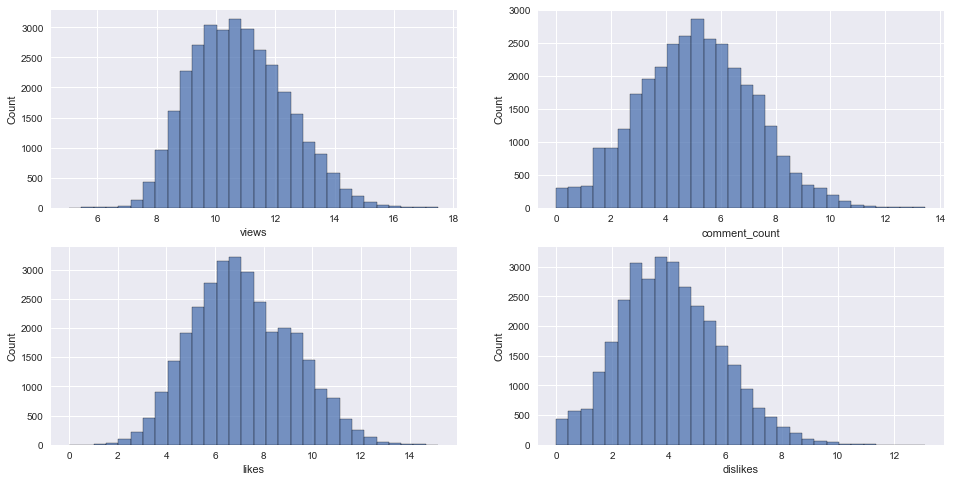

In [24]:
# ----------------------- Ver Forma Real de los Datos -----------------------
fig, ax = plt.subplots(2, 2, figsize=(16,8))

sns.histplot(df['views'], ax=ax[0,0], bins = 30)
sns.histplot(df['comment_count'], ax=ax[0,1], bins = 30)
sns.histplot(df['likes'], ax=ax[1,0], bins = 30)
sns.histplot(df['dislikes'], ax=ax[1,1], bins = 30);

# <font color='midnightblue'> Simulación nodo 3: Dislikes

In [49]:
nodo3 = df['comment_count']

In [50]:
nodo3.describe()

count    31965.000000
mean         5.114615
std          2.060654
min          0.000000
25%          3.688879
50%          5.117994
75%          6.522093
max         13.447856
Name: comment_count, dtype: float64

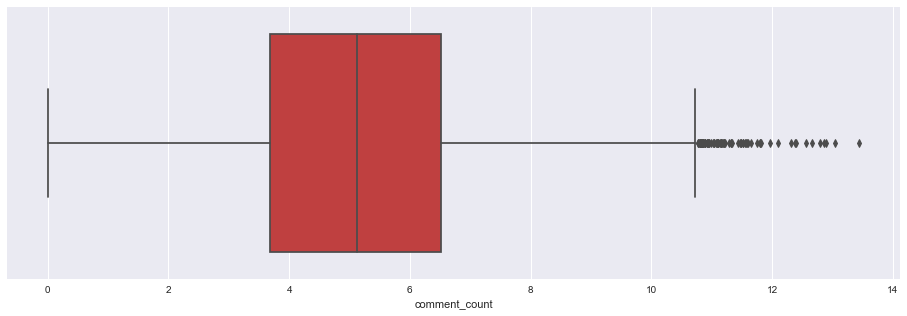

In [51]:
fig, ax1 = plt.subplots(figsize=(16, 5))
sns.boxplot(nodo3, ax = ax1, saturation=.5, color='r', fliersize=5);

(array([ 946., 2986., 5801., 7948., 7159., 4802., 1654.,  590.,   69.,
          10.]),
 array([ 0.        ,  1.34478556,  2.68957111,  4.03435667,  5.37914222,
         6.72392778,  8.06871333,  9.41349889, 10.75828444, 12.10307   ,
        13.44785555]),
 <BarContainer object of 10 artists>)

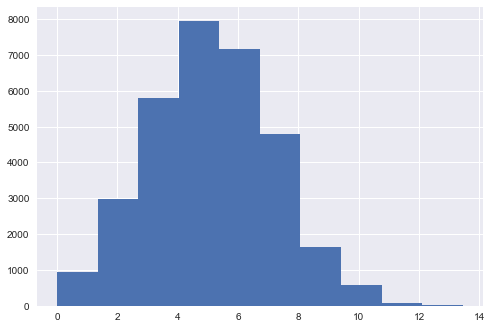

In [52]:
plt.hist(nodo3)

## <font color='midnightblue'> - Prueba con Función Creada

In [28]:
# -------------------- Distribuciones Seleccionadas Específicamente Para Este Nodo --------------------
dist_list = ['gumbel_r', 'kstwobign', 'maxwell', 'rayleigh', 'rice', 'beta', 'chi', 'nakagami']

In [ ]:
# dist_continu = [d for d in dir(st) if isinstance(getattr(st, d), st.rv_continuous)]
# dist_discrete = [d for d in dir(st) if isinstance(getattr(st, d), st.rv_discrete)]

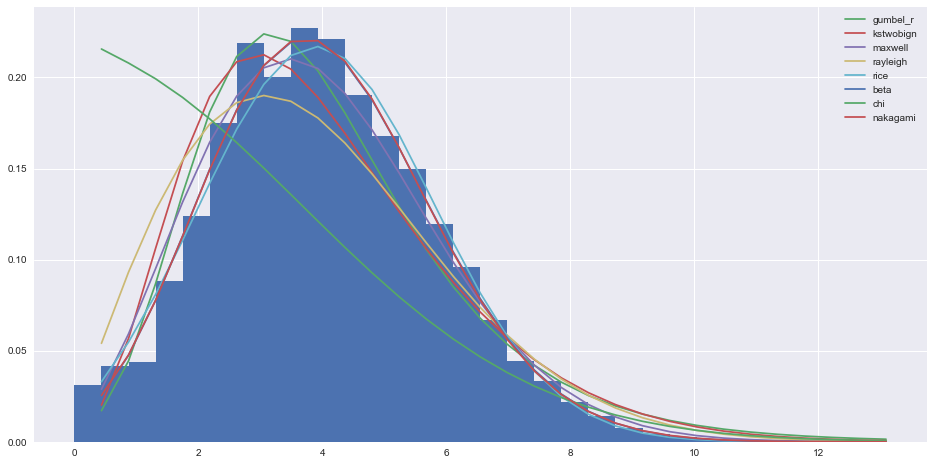

Wall time: 2.28 s


In [29]:
%%time
distribuciones(nodo3, dist_list, 30)

In [30]:
# -------------------- Top 5 Distribuciones Para 'Likes' --------------------
err.sort_values(by = 'MSE')

,MSE
rice,0.000132207
beta,0.000146041
nakagami,0.000147299
maxwell,0.000360098
gumbel_r,0.000624588
kstwobign,0.00085556
rayleigh,0.00101859
chi,0.00546775


In [31]:
best = err.sort_values(by = 'MSE').head(3).index.values
best

array(['rice', 'beta', 'nakagami'], dtype=object)

## <font color='midnightblue'> - Prueba con Método Fitter

Wall time: 1.15 s


,sumsquare_error,aic,bic,kl_div
beta,0.001729,266.629784,-534814.251799,inf
nakagami,0.001745,258.878652,-534528.141469,inf
rice,0.002810,274.062677,-519307.611318,inf
maxwell,0.004476,239.155712,-504429.940343,inf
gumbel_r,0.008809,209.020797,-482790.839711,inf


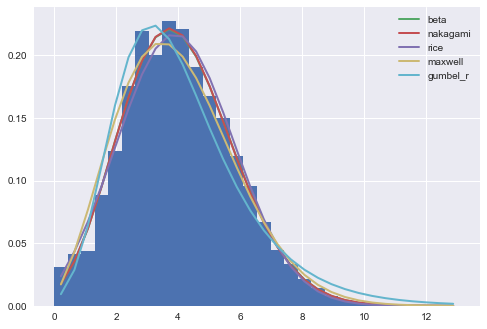

In [32]:
%%time
fitter(nodo3, dist_list, 15, 30)
f.summary()

#### <font color='midnightblue'> Conclusión Para Distribuciones con la Función Creada y Método Fitter:
    
> Para ambos métodos se pude comprobar visualmente que las distribuciones elegidas se ajustan bien a nuestros datos, pero los resultados no fueron concluyentes, así que decidimos ahcer esto para elegir las mejores distribuciones:
Al primer lugar se le dan 3 puntos, al segundo 2 y al tercero 1.
rice acumula 4 puntos, beta 5 y nakagami 3. Entonces así decidimos establecer el top 3 de distribuciones para trabajar y hacer futuras pruebas.


In [33]:
best_dist = ['beta', 'rice', 'nakagami']

## <font color='midnightblue'> - Prueba Q-Q Para la Distribución Beta

In [36]:
def qq(data:'Datos',
       dist:'Distribución'):
    
    '''
    Función para método Q-Q
    ----------
    data: datos a ajustar
    dist: string o array de strings de distribuciones
    ''' 
    
    fig, ax = plt.subplots(1, 1, figsize = [14, 6])
    grap_1 = sm.qqplot(data, dist=getattr(st, dist), line = 'q', fit = True, ax = ax)

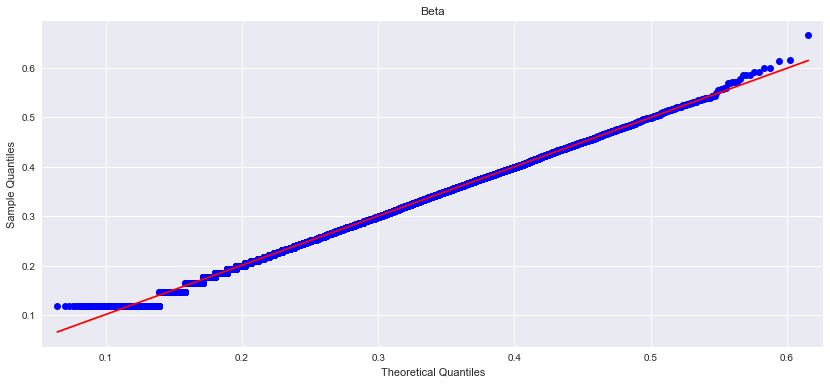

In [44]:
qq(nodo3, best_dist[0]) 
plt.title('Beta');

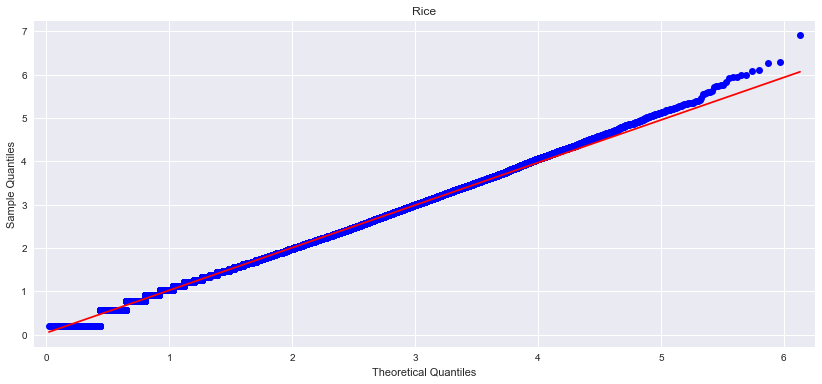

In [45]:
qq(nodo3, best_dist[1])
plt.title('Rice');

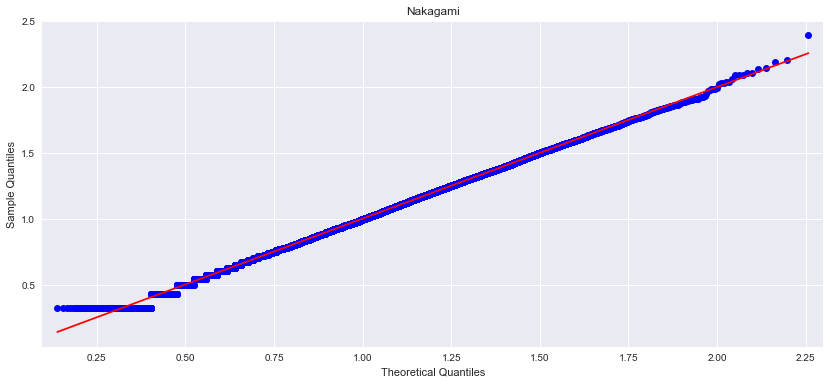

In [47]:
qq(nodo3, best_dist[2])
plt.title('Nakagami');

> La mayor (no tan grande) incongruencia en la prueba Q-Q está en la cola derecha, visible también en el diagrama de caja. Es suficiente para negar o afirmar que la distribución es Beta? lo averiguaremos con la prueba $\chi^2$ y la prueba de Kolmogorov - Smirnov.

## <font color='midnightblue'> - Prueba de la Chi Cuadrada $\chi^2$ Para la Distribución Beta
    
#### <font color='midnightblue'> Hipótesis Nula $H_0$:
la distribución es Beta con "media= $\mu$" y "desviación estándar = $\sigma$"
#### <font color='midnightblue'> Hipótesis Alterna $H_a$:
La distribución no es Beta

In [ ]:
mu = x.mean()
sigma = x.std()
param = getattr(st, 'beta').fit(x)

In [ ]:
pi = st.beta.pdf(x, *param)
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi
# Cálculo usando la librería estadística de la chi cuadrada
Xs = st.chisquare(y, Ei)
print('Valor de chi cuadrado librería: ', Xs)

# Cálculo de Grados de libertad del estadístico
p = 3 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est2 = st.chi2.ppf(q = 0.90, df = m)
print('Estadístico de chi_cuadrado = ', Chi_est2)
print('Media muestral: %f \nDesviación estándar muestral: %f '%(mu, sigma))
print('Media real: %f \nDesviación real: %f'%(nodo3.mean(), nodo3.std()))

#### <font color='midnightblue'> Conclusión Método Chi Cuadrada $\chi^2$:
> <font color='midnightblue'> El pvalue es suficientemente grande, y si es grande no se rechaza. Damos como válida la $H_0$

## <font color='midnightblue'> - Kolmogorov - Smirnov Para las Mejores 3 Distribuciones
#### <font color='midnightblue'>Fijamos un Nivel de Confianza de 99%. Entonces, si pvalue es menor a .01, el ajuste no será apropiado.
#### <font color='midnightblue'> Hipótesis Nulas $H_0$:

In [ ]:
h0 = ['$H_0$ = La PDF es {}'.format(dist) for dist in best]
h0

#### <font color='midnightblue'> Hipótesis Alternas $H_a$:

In [ ]:
ha = ['$H_a$ = La PDF no es {}'.format(dist) for dist in best]
ha

In [ ]:
nodo3_m = np.random.choice(df['dislikes'], 1000)

In [ ]:
top_kol_smir = [kol_smir_test(nodo3_m, dist) for dist in best]

In [ ]:
top_kol_smir

### <font color='midnightblue'> Conclusión Método Kolmogorov - Smirnov:
> <font color='midnightblue'> Los pvalue son mayores al nivel de significancia establecido, entonces podemos aceptar las 3 $H_0$. 

> <font color='midnightblue'> Además, el resultado es consistente con el top de distribuciones con menor error.

## <font color='midnightblue'> - Estimación de función para MDAR con KDE

In [ ]:
xg = np.linspace(min(nodo3), max(nodo3), 6000)

In [ ]:
min(nodo3)

In [ ]:
nodo3_m.shape

In [ ]:
%%time
f = KDE_f(nodo3_m, xg, 30)

In [ ]:
%%time
V_A_nodo3 = random_gen(f, xg, nodo3_m, 1000)
V_A_nodo3

In [ ]:
V_A_nodo3_exp = np.exp(V_A_nodo3)
V_A_nodo3_exp

## <font color='midnightblue'> - Intervalo de Confianza Para la Media de los Datos

In [ ]:
# Intervalo de confianza usando t-student
i1 = st.t.interval(.95, len(V_A_nodo3_exp)-1, loc=np.mean(V_A_nodo3_exp), scale=st.sem(V_A_nodo3_exp))
# Intervalo de confianza usando distribución normal
i2 = st.norm.interval(.95, loc=np.mean(V_A_nodo3_exp), scale=st.sem(V_A_nodo3_exp))
print('Con una confianza de %2.2f la media estará en el intervalo t,\n %s     ' %(.95,i1))
print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(.95,i2))
print('Media calculada' , np.mean(V_A_nodo3_exp))

In [ ]:
np.mean(np.exp(df['dislikes']))

In [ ]:
np.mean(V_A_nodo3_exp)

# <font color='midnightblue'> - Conclusiones Nodo 3: Dislikes
    
> Las comprobación de las 3 mejores distribuciones (Beta, Chi, Nakagami) es consistente en todos los métodos implementados: Función creada, método fitter, prueba Q-Q, Chi Cuadrada y Kolmogorov-Smirnov (en este fallaron Chi y Nakagami).

> Con una muestra de los datos reales nos fue posible generar V.A que son consistentes con los estadísticos del dataset original, entonces comprobamos la hipótesis de la Ley de los Grandes Números.

# <font color='midnightblue'> ANEXOS

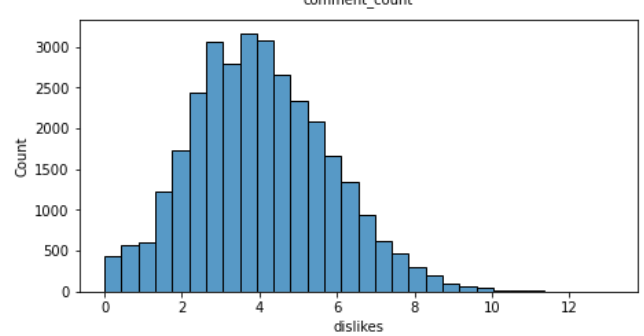

In [ ]:
#['exponweib', 'foldnorm', 'geninvgauss', 'gumbel_r', 'invgauss', 'johnsonsb', 'kappa4', 'kappa4.1', 'kappa4.2', 'kappa4.3', 'ksone', 'kstwo', 'kstwobign', 'maxwell', 'rayleigh', 'rice', 'weibull_min']

In [ ]:
# ----------------------- Imagen de Distribuciones Continuas -----------------------
display.Image("./Distribuciones.png")

## <font color='midnightblue'> Fuentes Consultadas
> https://fitter.readthedocs.io/en/latest/index.html
    
> https://www.statology.org/kolmogorov-smirnov-test-python/
    
>
    
>
    
>
    
>
    
>
    
>
    
>
    
>
    